In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [90]:

# Vista general del dataset
data = pd.read_csv('D:\\M-Users\\samuel_bolano\\Desktop\\Titanic-Dataset.csv')
print(data.head())
print(data.info())
print(data.describe())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [92]:
#Revisamos los valores faltantes:
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


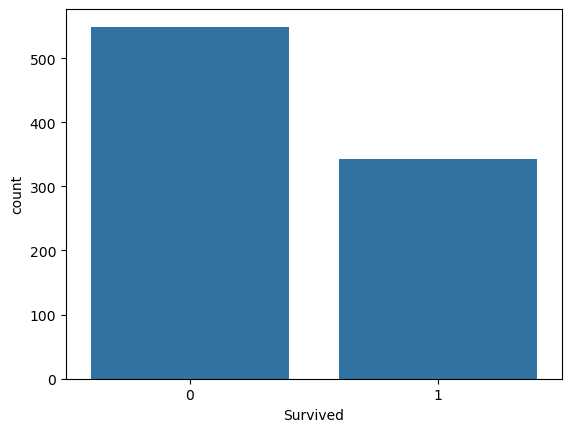

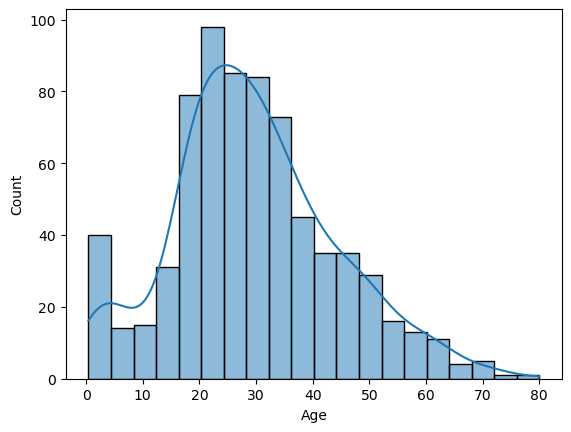

In [94]:
#Visualizamos las distribuciones:
sns.countplot(x='Survived', data=data)
plt.show()
sns.histplot(data['Age'], kde=True)
plt.show()


In [106]:
# Convierte variables categóricas a numéricas:
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Embarked'] = data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [104]:
Eliminamos columnas irrelevantes:
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

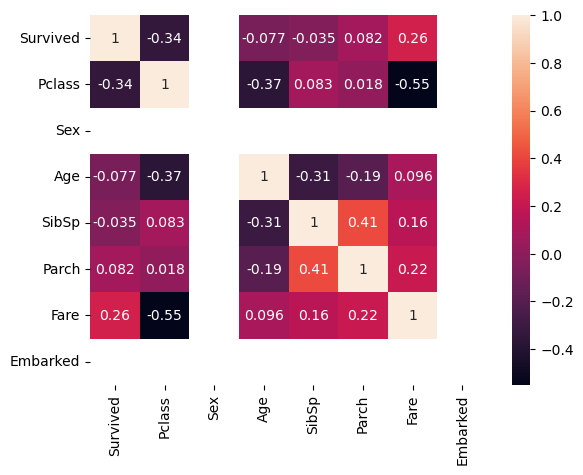

In [110]:
#Verifica las correlaciones:
correlation = data.corr()
sns.heatmap(correlation, annot=True)
plt.show()


In [115]:
from sklearn.model_selection import train_test_split

X = data.drop('Survived', axis=1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [117]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)


DecisionTreeClassifier()

In [119]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1-Score: {f1_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))


Accuracy: 0.6536312849162011
Precision: 0.5909090909090909
Recall: 0.527027027027027
F1-Score: 0.5571428571428572
              precision    recall  f1-score   support

           0       0.69      0.74      0.72       105
           1       0.59      0.53      0.56        74

    accuracy                           0.65       179
   macro avg       0.64      0.63      0.64       179
weighted avg       0.65      0.65      0.65       179



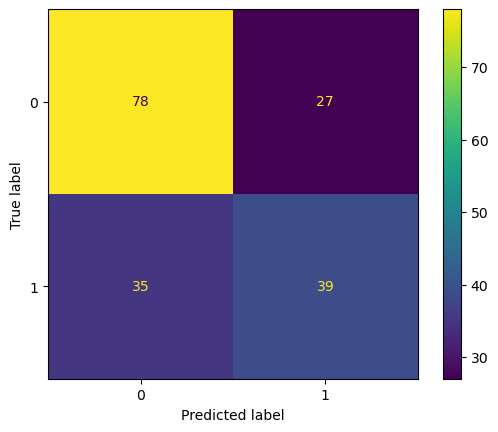

In [121]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()